# Assignment


This assignment, we focus on **content-based recommenders**.


In [341]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The data we use in this assignment is a movie meta-data that accompanies the user-movie rating data we used in the lecture. Let's take a look:


In [342]:
df_movies = pd.read_csv("./movies.csv")
display(df_movies.head())

df_ratings = pd.read_csv("./ratings.csv")
display(df_ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Question 1. Do some exploratory analysis of the data. Please do at least 3 different analysis. 1 analysis/data exploration should be a visualization of some sort (bar, histogram, boxplot, etc.).


In [343]:
"""
I'm adding a little data preparation before the data exploration, so that it's a little easier to analyze.
"""

# First let's make sure that there are no white characters in the titles.
df_movies["title"] = df_movies["title"].apply(lambda x: x.strip())

# Let's reset the index so that we're working with the proper ids
if not df_movies.index.name == "movieId":
    df_movies = df_movies.set_index("movieId")

# Let's try extracting the year from the titles
df_movies["year"] = (
    df_movies["title"].str.extract(r"\((\d{4})\)$")[0].fillna(0).astype(int)
)

# Fill out the title for a good measure. It seems that not all the titles contain the year, so let's
# handle in two steps.
df_movies["title_only"] = df_movies[df_movies["year"] == 0]["title"]
df_movies["title_only"] = df_movies[df_movies["year"] > 0]["title"].str[:-7]

display(df_movies.head())

,title,genres,year,title_only
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story
2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji
3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale
5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [344]:
# Data Exploration 1

"""
Let's first look at the amount of the movies in general.

"""

print(f"There are {df_movies['title'].count()} movies in general")

There are 9742 movies in general


<Axes: xlabel='rating', ylabel='count'>

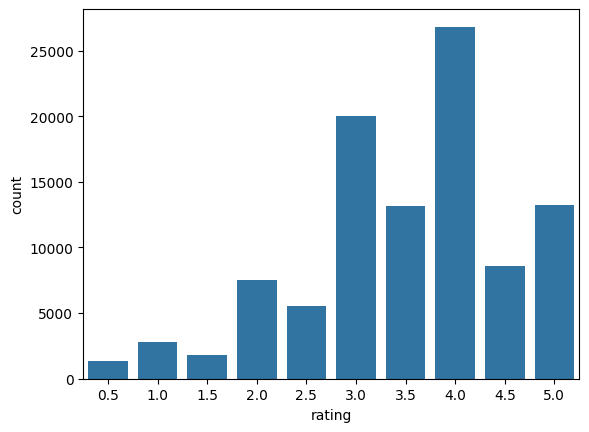

In [345]:
# Data Exploration 2

"""
What is the distribution of the rating?
"""

sns.countplot(df_ratings, x="rating")

In [346]:
# Data Exploration 3
"""
What are the metrics of the ratings?
"""

df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Question 1.1: Since the `genres` column is not in the right format for us to do comparisons, create a dummy column for each genre. You can use the `str.get_dummies` method to do this.


In [347]:
#
dummy_genres = df_movies["genres"].str.get_dummies("|")
df_movies = pd.concat([df_movies, dummy_genres], axis=1).drop("genres", axis=1)

df_movies.head()

,title,year,title_only,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995,Jumanji,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995,Grumpier Old Men,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),1995,Waiting to Exhale,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),1995,Father of the Bride Part II,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Questioin 1.2: Validate Question 1.1 updates by displaying the genres list for the movie `Toy Story (1995)` as the reference movie. Hint: Drop the movieId and title column and transpose the data to make it easier to read.


In [348]:
movie_chosen = df_movies[df_movies["title_only"] == "Toy Story"].drop(
    ["title", "year", "title_only"], axis=1
)
movie_chosen.transpose()

movieId,1
(no genres listed),0
Action,0
Adventure,1
Animation,1
Children,1
Comedy,1
Crime,0
Documentary,0
Drama,0
Fantasy,1


Question 1.3: Create a new `DataFrame` that will store the similarity scores. Hint: Compy df_movies for columns movieId and title.


In [349]:
df_sim = df_movies.reset_index()[["movieId", "title"]].copy()
display(df_sim.head())

movie_chosen = movie_chosen.reset_index(drop=True)
display(movie_chosen)

df_movies = df_movies.reset_index()
display(df_movies.head())

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


,movieId,title,year,title_only,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,Jumanji,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,Grumpier Old Men,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,Waiting to Exhale,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,Father of the Bride Part II,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Question 2.1: Find all the movies similar to the above movie. The easiest way to do this is by using the `pd.DataFrame.corrwith` method. You can pass `movie_chosen` to this method and specify the correct value for `axis`. The default similarity metric used is Pearson's correlation, so add a new column to the `df_sim` data called `sim_pearson` to store the similarity scores. Show the top 5 rows of the resulting data.


In [356]:
repeated_chosen_movie = pd.DataFrame(
    [movie_chosen.loc[0]] * df_movies.shape[0]
).reset_index(drop=True)

df_sim["sim_pearson"] = df_movies.corrwith(repeated_chosen_movie, axis=1)
df_sim.head(10)

,movieId,title,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),1.000000,1.000000,NaN
1,2,Jumanji (1995),0.727607,0.600000,NaN
2,3,Grumpier Old Men (1995),0.192450,0.166667,NaN
3,4,Waiting to Exhale (1995),0.080845,0.142857,NaN
4,5,Father of the Bride Part II (1995),0.397360,0.200000,NaN
5,6,Heat (1995),-0.242536,0.000000,NaN
6,7,Sabrina (1995),0.192450,0.166667,NaN
7,8,Tom and Huck (1995),0.577350,0.400000,NaN
8,9,Sudden Death (1995),-0.132453,0.000000,NaN
9,10,GoldenEye (1995),0.080845,0.142857,NaN


Question 2.2: Pearson's correlation may not be the best similarity metric to use with the data we have, so try [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) instead. To specify another similarity function, we can use the `method` argument of `corrwith`. Unforetunately, Jaccard similarity is not one of the default metrics offered, but `method` also accepts functions (referred to as a "callable" in the doc).

- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, using Jaccard similarity. Add the similarity scores to `df_sim` as a new column calld `sim_jaccard` and show the top 5 rows.


In [357]:
from sklearn.metrics import jaccard_score

df_sim["sim_jaccard"] = df_movies.corrwith(
    repeated_chosen_movie, axis=1, method=jaccard_score
)
df_sim.head()

,movieId,title,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),1.000000,1.000000,NaN
1,2,Jumanji (1995),0.727607,0.600000,NaN
2,3,Grumpier Old Men (1995),0.192450,0.166667,NaN
3,4,Waiting to Exhale (1995),0.080845,0.142857,NaN
4,5,Father of the Bride Part II (1995),0.397360,0.200000,NaN


Question 2.3: Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, but this time use cosine similarity. Add the similarity scores to `df_sim` as a new column calld `sim_cosine` and show the top 5 rows.


In [363]:
from sklearn.metrics.pairwise import cosine_similarity

df_sim["sim_cosine"] = cosine_similarity(
    df_movies.drop(["title", "movieId", "title_only", "year"], axis=1),
    repeated_chosen_movie,
)
df_sim.head()

,movieId,title,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),1.000000,1.000000,1.000000
1,2,Jumanji (1995),0.727607,0.600000,0.774597
2,3,Grumpier Old Men (1995),0.192450,0.166667,0.316228
3,4,Waiting to Exhale (1995),0.080845,0.142857,0.258199
4,5,Father of the Bride Part II (1995),0.397360,0.200000,0.447214


We built a simple example of a recommender system above. Now let's make this more interesting by adding additional information to the above table that can help us filter the recommendations. Specifically, we want to be able to filter by the movie's popularity (number of users who rated it) and its average rating (average over users). This information is not part of the movie meta-data, so we have to turn to the data with the ratings. This makes it a basic example of a hybrid approach.

The code below will load the data and reshape it from long to wide using `pivot_table`:


In [364]:
df_ratings = pd.read_csv("./ratings.csv")
movie_user_mat = df_ratings.pivot_table(
    index="movieId", columns="userId", values="rating"
)
movie_user_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Question 3.1: From the table above, extract the average rating of each movie and the number of ratings received by each movie. Add those as two new columns to `df_sim`, and call them `ratings_avg` and `ratings_cnt` respectively. Show the top 5 rows.


In [377]:
# df_ratings.groupby('movieId')[['rating']].mean().reset_index()['rating']
df_sim["ratings_avg"] = (
    df_ratings.groupby("movieId")[["rating"]].mean().reset_index()["rating"]
)
df_sim["ratings_cnt"] = (
    df_ratings.groupby("movieId")[["rating"]].count().reset_index()["rating"]
)
df_sim.head()

,movieId,title,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
0,1,Toy Story (1995),1.000000,1.000000,1.000000,3.920930,215.0
1,2,Jumanji (1995),0.727607,0.600000,0.774597,3.431818,110.0
2,3,Grumpier Old Men (1995),0.192450,0.166667,0.316228,3.259615,52.0
3,4,Waiting to Exhale (1995),0.080845,0.142857,0.258199,2.357143,7.0
4,5,Father of the Bride Part II (1995),0.397360,0.200000,0.447214,3.071429,49.0


Question 3.2: Now find all the movies that are similar to `Toy Story (1995)` using cosine similarity, just like we did earlier, but this time limit the results to movies in the bottom 40th percentile in terms of popularity (`ratings_cnt`) and the top 40th percentile in terms of average rating (`ratings_avg`). Show the top 5 rows.


In [385]:
count_quantile = df_sim["ratings_cnt"].quantile(0.6)
avg_quantile = df_sim["ratings_avg"].quantile(0.4)
less_known = df_sim[df_sim["ratings_cnt"] < count_quantile]
high_rating = df_sim[df_sim["ratings_avg"] > avg_quantile]

pd.concat([less_known, high_rating]).sort_values("sim_cosine", ascending=False).head()

,movieId,title,sim_pearson,sim_jaccard,sim_cosine,ratings_avg,ratings_cnt
9430,166461,Moana (2016),1.0,1.0,1.0,4.0,1.0
2809,3754,"Adventures of Rocky and Bullwinkle, The (2000)",1.0,1.0,1.0,3.5,3.0
7760,91355,Asterix and the Vikings (Astérix et les Viking...,1.0,1.0,1.0,4.0,1.0
9430,166461,Moana (2016),1.0,1.0,1.0,4.0,1.0
6486,53121,Shrek the Third (2007),1.0,1.0,1.0,0.5,1.0


[Bonus] Question 4: In the exercise above, we obtained similarity scores between `Toy Story (1995)` and all other movies. Perfomed all possible pairwise comparisons.


In [386]:
sim_mat = df_movies.reset_index()[["movieId", "title"]].copy()
display(sim_mat.head())

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [389]:
from scipy.spatial.distance import pdist, squareform

sim_mat = squareform(
    pdist(
        df_movies.drop(["title", "movieId", "title_only", "year"], axis=1).T,
        metric=jaccard_score,
    )
)
print(sim_mat)

# Alternatively, just cosine_similarity function returns the matrix.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.2458686  0.06181976 0.03188406 0.08322017
  0.16021464 0.00176678 0.0934629  0.08670279 0.0026178  0.05369884
  0.04912837 0.00231803 0.03536007 0.02791954 0.19134493 0.21356374
  0.06147935 0.02150538]
 [0.         0.2458686  0.         0.15181315 0.19318885 0.08636364
  0.02626094 0.00353565 0.05853567 0.19555035 0.00148368 0.01356852
  0.05965697 0.02569043 0.02056698 0.04343066 0.15797625 0.06727519
  0.03524229 0.02656138]
 [0.         0.06181976 0.15181315 0.         0.31038027 0.06564178
  0.0117384  0.0028626  0.01739308 0.14403292 0.00287356 0.01081425
  0.0462585  0.07876712 0.01630901 0.02128644 0.07210243 0.00723764
  0.00709939 0.00387097]
 [0.         0.03188406 0.19318885 0.31038027 0.         0.08920651
  0.00648298 0.00090662 0.02051178 0.169

Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.


I was really excited about the dataset when I saw it was about the movies! In my work I use cosine similarity for LLM embeddings, so I was not unfamiliar with it. It was interesting to see how it is applied to other vectors too.

I would love to see how well does this problem scale. I know the search engines (like Elasticsearch, MongoDB) can make a relatively fast cosine similarity searches, and I'm interested to see how this can be achieved at scale.